<a href="https://colab.research.google.com/github/Maqar/ML/blob/main/Credits_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f

Напишите скрипт на Python, который строит сводную таблицу Comission/Рейтинг

In [ ]:
data = pd.read_csv('test2.csv', usecols = ['Loan issued','Рейтинг','Comission, %'], sep=',', header=1)
data = data.dropna(axis=0)
data['Loan issued'] = data['Loan issued'].apply(lambda x: int(x.replace('\xa0', '').replace(' ₽', '')))
data['Loan issued, тыс.'] = data['Loan issued'] / 1000
data['Comission, %'] = data['Comission, %'].apply(lambda x: float(x.replace('%', '').replace(',', '.')))

conditions = [
    (data['Comission, %'] < 3.0),
    (data['Comission, %'] >= 3.0 ) & (data['Comission, %'] < 4.0),
    (data['Comission, %'] >= 4.0) & (data['Comission, %'] < 5.0),
    (data['Comission, %'] >= 5.0) & (data['Comission, %'] < 6.0),
    (data['Comission, %'] >= 6.0) & (data['Comission, %'] < 7.0),
    (data['Comission, %'] >= 7.0) & (data['Comission, %'] < 8.0),
    (data['Comission, %'] >= 8)
    ]
values = ['2-3%', '3-4%', '4-5%', '5-6%', '6-7%', '7-8%', '8-9%']
data['Comission'] = np.select(conditions, values)

data_pivot = pd.pivot_table(data,
               index=["Comission"],
               columns=["Рейтинг"],
               values=["Loan issued, тыс."],
               aggfunc='sum')
data_pivot = data_pivot.fillna(0).astype('int')

cm = sns.light_palette("green", as_cmap=True)
data_pivot.style.background_gradient(cmap=cm)

Задача: максимизировать экономическую прибыль.

Преобразование и анализ данных

In [ ]:
data = pd.read_csv('test2.csv', sep=',', header=1)
#преобразуем данные: удалим пустые строки и стобцы, преобразуем нечитаемые колонки, уберем лишние символы и преобразуем форматы данных
data = data.dropna(axis=1)
data = data.rename(columns={data.columns[4]: 'Unpaid'})
data['Loan issued'] = data['Loan issued'].apply(lambda x: int(x.replace('\xa0', '').replace(' ₽', '')))
data['Earned interest'] = data['Earned interest'].apply(lambda x: int(x.replace('\xa0', '').replace(' ₽', '')))
data['Unpaid'] = data['Unpaid'].apply(lambda x: int(x.replace('\xa0', '').replace(' ₽', '')))
data['Comission, %'] = data['Comission, %'].apply(lambda x: float(x.replace('%', '').replace(',', '.'))/100)
data['EL'] = data['EL'].apply(lambda x: float(x.replace('%', '').replace(',', '.'))/100)
#посчитаем необходимые признаки
data['Loss'] = data['Unpaid'] * data['EL']
data['InvestProfit'] = data['Earned interest'] - data['Loss']
data['Profit'] = data['InvestProfit'] + data['Loan issued'] * data['Comission, %']
data['Profit%'] = data['Profit'] / data['Loan issued']
data


,Loan issued,Рейтинг,"Comission, %",Earned interest,Unpaid,EL,учредителю подсказывают / на ВИ другой человек,"На ВИ присутствует ""сотрудник"", в тч за кадром, который отвечает на вопросы","""Сотрудник"" отвечает на вопросы. ГД/учредитель молчит или отвечает редко.",В компании была смена учредителя,...,За ответом на вопросы 10-14 просит обратиться к сотруднику,Данные предоставленные заемщиком разнятся с действительностью > 50%,"Есть ""партнер"", который официально не оформлен","Не потребовалось денег для начала бизнеса, тк были договоренности с поставщиками","Офис находится в здании партнера/друга/родственника, аренду не платит.",Заемщик от партнера и был подготовлен к ВИ,Loss,InvestProfit,Profit,Profit%
0,3170000,7,0.0530,211051,862850,0.015,0,0,0,0,...,0,0,0,0,0,0,12942.750,198108.250,366118.250,0.115495
1,500000,17,0.0650,39518,289518,0.100,0,0,0,0,...,0,0,0,0,0,0,28951.800,10566.200,43066.200,0.086132
2,11600897,9,0.0450,537680,9567386,0.015,0,0,0,1,...,0,0,0,0,0,0,143510.790,394169.210,916209.575,0.078977
3,5250000,13,0.0450,233022,2858022,0.015,0,0,0,0,...,0,0,1,0,0,0,42870.330,190151.670,426401.670,0.081219
4,3000000,8,0.0375,216485,0,0.000,0,0,0,0,...,0,0,0,0,0,0,0.000,216485.000,328985.000,0.109662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,3000000,17,0.0680,83062,3206436,0.015,0,0,0,0,...,0,0,0,0,0,0,48096.540,34965.460,238965.460,0.079655
528,6560000,10,0.0530,250635,4309425,0.015,0,0,0,0,...,0,0,0,0,0,0,64641.375,185993.625,533673.625,0.081353
529,2844671,14,0.0550,233514,1064981,0.400,0,0,0,0,...,0,0,0,0,0,0,425992.400,-192478.400,-36021.495,-0.012663
530,500000,12,0.0550,13235,414705,0.015,0,0,0,0,...,0,0,0,0,0,0,6220.575,7014.425,34514.425,0.069029


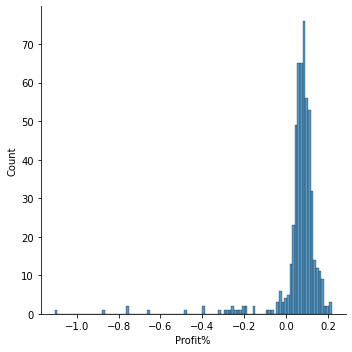

In [ ]:
#построим диаргамму распределения Profit%, чтобы оценить данные
sns.displot(x='Profit%', data=data)
#для чего нам это нужно? чтобы оценить какой Profit% нас устраивает для выдачи кредита. 
#в данном случае, так как у нас нет ограничения на сумму выданных кредитов, клиентам с Profit% <= 0 мы точно не хотели бы выдавать кредит.
#если бы все Profit% были > 0 и у нас были ограничения на сумму выданных кредитов, то мы определяли бы другой порог Profit% для выдачи кредита:
#имея S денег для кредитов, разделим наши данные на n подвыборок (если данных мало можем воспользоваться бутсрэпом), отранжируем каждую подвыборку по Profit% по убыванию, 
#посчитаем Cumsum_Loan_issued как куммулятивную сумму Loan issued, возьмем Profit%[i-1] при Cumsum_Loan_issued[i] > S и посчитаем средний Profit% по n подвыборкам.  

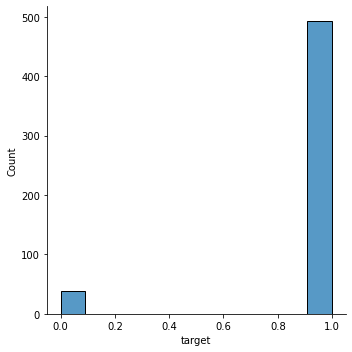

In [ ]:
data['target'] = np.where(data['Profit%'] <= 0, 0, 1)
#перед нами стоит задача классификации, где 1 - выдавать кредит, 0 - не выдавать кредит
sns.displot(x='target', data=data)
#видим дисбалан классов. 
#Воспользовавшись Undersampling (удаление экземляров большего класса) мы можем лишиться информации о распределении большего класса.
#Удалять данные стоит после тщательного анализа на выявление похожих экземпляров данных большего класса

#Воспользовавшись Oversampling (дублирование экземпляров меньшего класса) мы рискуем переобучить модель большим количестов похожих данных меньшего класса.
#Oversampling следует делать путем генерации новых данных из распределений данных меньшего класса
#воспользуемся для начала встроенными инстументами балансировки весов классов в моделях классификации 

In [ ]:
#не всегда удается со 100% точностью делать предсказания, поэтому нам нужно решить в какую сторону нам менее затратно ошибаться:
#выдать кредит и не вернуть его (predict: 1, actual:0) - «пропуск цели», FP, ошибка I рода
#или не выдать кредит и потерять прибыль (predict: 0, actual:1) - «ложная тревога», FN, ошибка II рода
median_loss_0 = abs(data.loc[data['target'] == 0, 'Profit%'].median())
median_loss_1 = abs(data.loc[data['target'] == 1, 'Profit%'].median())
median_loan = data['Loan issued'].median()
print('Loss Profit%% «пропуск цели»: %.2f' % median_loss_0)
print('Loss Profit %% «ложная тревога»: %.2f' % median_loss_1)
print('Loss Profit «пропуск цели»: %.2f' % (median_loan*median_loss_0))
print('Loss Profit «ложная тревога»: %.2f' % (median_loan*median_loss_1))
#расчитав медианные потери (медиана устойчива к выбросам в отличие от средней), можем видеть, что потери от ошибки I рода больше, чем от ошибки II рода

Loss Profit% «пропуск цели»: 0.19
Loss Profit % «ложная тревога»: 0.08
Loss Profit «пропуск цели»: 442755.81
Loss Profit «ложная тревога»: 188288.73


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

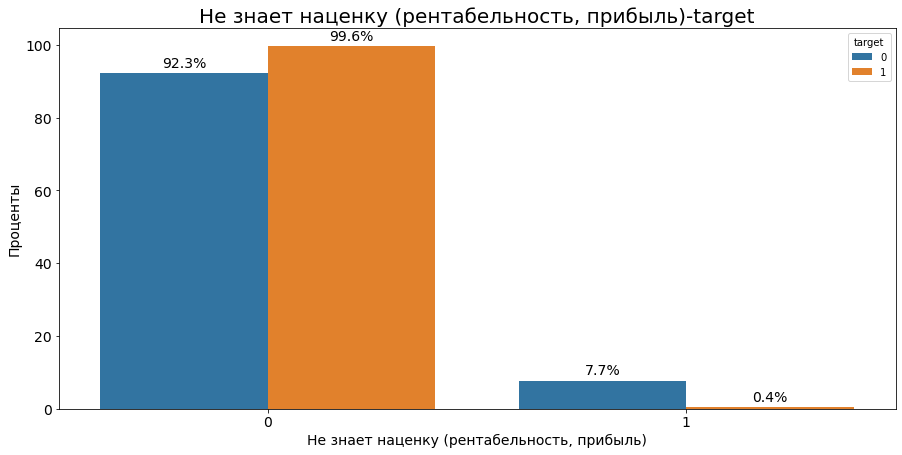

In [ ]:
#построим график для проверки гипотезы, что фактор "Не знает наценку (рентабельность, прибыль)" влияет на нашу целевую переменную
#мы предполагаем, что если фактор не влияет на целевую переменную, то доли распределений целевой переменной будут близки
plt.figure(figsize=(15, 7))

educ_def = (data.groupby(['target'])['Не знает наценку (рентабельность, прибыль)']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Не знает наценку (рентабельность, прибыль)'))

ax = sns.barplot(x="Не знает наценку (рентабельность, прибыль)", y="percentage", hue="target", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center',  
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  
                fontsize=14)

plt.title('Не знает наценку (рентабельность, прибыль)-target', fontsize=20)
plt.ylabel('Проценты', fontsize=14)
plt.xlabel('Не знает наценку (рентабельность, прибыль)', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#можем видеть, что доля невыгодных кредитов выше при незнании наценки (рентабельности, прибыли)   

In [ ]:
#визуализируем это по-другому. построим таблицу 2х2 невыданные/выданные кредиты при оценке фактора 'Не знает наценку (рентабельность, прибыль)'
df1 = pd.crosstab(index=data['Не знает наценку (рентабельность, прибыль)'], columns=data['target'])
#также составим таблицу ожидаемых чисел, которые мы получили бы, если бы фактор не влиял на выдачу кредита. посчитаем долю невыданных кредитов
p_0 = len(data[data['target'] == 0]) / len(data)
#примем нулевую гипотезу о том, что фактор не влияет на выдачу кредита. тогда кол-во невыданных кредитов должно с равной частотой p_0 наблюдаться в обеих группах фактора
df2 = df1.copy()
df2['sum'] = df2.sum(axis=1)
df2[0] = round(df2['sum'] * p_0, 2)
df2[1] = round(df2['sum'] * (1-p_0), 2)
df2 = df2.drop('sum', axis=1)
print(df1)
print('Таблица ожидаемых чисел')
print(df2)
#числа в клетках различаются. следовательно, реальная картина отличается от той, которая наблюдалась бы, если бы фактор не оказывал влияния выдачу кредита.
#теперь осталось построить критерий, который бы характеризовал эти различия одним числом, и затем найти его критическое значение

target                                       0    1
Не знает наценку (рентабельность, прибыль)         
0                                           36  491
1                                            3    2
Таблица ожидаемых чисел
target                                          0       1
Не знает наценку (рентабельность, прибыль)               
0                                           38.63  488.37
1                                            0.37    4.63


In [ ]:
#воспользуемся критерием Хи2 для таблицы 2х2. критерий Хи2 определим по формуле: Хи2 = ∑((O-E)^2)/E, 
#где O - наблюдаемое число в клетке таблицы сопряженности, Е  -  ожидаемое число в той же клетке
def X2(df1, df2):
    df3 = ((df1 - df2)**2)/df2
    return df3.values.sum()

X2(df1, df2)

20.381473585236943

In [ ]:
#3.8 - критическое значение для 5% уровня значимости (расчитывается по таблице). мы получили значение 20.38,
#поэтому мы отклоняем гипотезу об отсутствии связи между фактором и выдачей кредита
#напишим функцию для проверки влияния каждого фактора на целевую переменную 
def cross(feature, feat):   
    df1 = pd.crosstab(index=data[feature], columns=data['target'])
    df2 = df1.copy()
    df2['sum'] = df2.sum(axis=1)
    df2[0] = round(df2['sum'] * p_0, 2)
    df2[1] = round(df2['sum'] * (1-p_0), 2)
    df2 = df2.drop('sum', axis=1)
    #print(i, X2(df1, df2))
    if X2(df1, df2) >= 3.8:
        feat.append(feature)

feat = []
for i in data.columns[6:len(data.columns)-5]:
    cross(i, feat)

#отобраные по критерию признаки
feat

['На ВИ присутствует "сотрудник", в тч за кадром, который отвечает на вопросы',
 'Не знает ФОТ',
 'Не знает наценку (рентабельность, прибыль)']

Подготовка данных и построение моделей

In [ ]:
from numpy import mean
from numpy import std
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, auc, log_loss, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, ConfusionMatrixDisplay

In [ ]:
X = data[feat]
y = data['target']

In [ ]:
#обязательно ставим stratify, чтобы и в train и в test было одинаковое распределение классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

TRAIN
Accuracy: 0.86
ROC AUC Score: 0.61
accuracy 0: 0.31
accuracy 1: 0.90
TEST
Accuracy: 0.84
ROC AUC Score: 0.58
accuracy 0: 0.30
accuracy 1: 0.89
Loss: 5735332.89


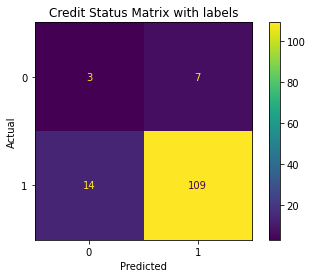

In [ ]:
#обучим три модели и посмотрим на их результаты, обязательно проставлем в модели параметр class_weight = 'balanced', чтобы балансировать веса классов
model = LogisticRegression(class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1] 

train_probs = model.predict_proba(X_train)[:,1] 
train_predictions = model.predict(X_train)
cm = confusion_matrix(y_train, train_predictions)
print('TRAIN')
print('Accuracy: %.2f' % (accuracy_score(y_train, train_predictions)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_train, train_probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))

print('TEST')
cm = confusion_matrix(y_test, y_pred)
#общая точность
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_test, probs)))
#точность предсказания 0 класса
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
#точность предсказания 1 класса
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))
#денежные потери от ошибок модели
print('Loss: %.2f' % (cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1))
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Credit Status Matrix with labels', 
                xlabel='Predicted', 
                ylabel='Actual')
plt.show()

In [ ]:
#создадим таблицу с метриками, в которую будем записывать наши результаты
metrics = pd.DataFrame(
    index=['roc-auc', 'accuracy 0', 'accuracy 1', 'loss'])

metrics['LR'] = [roc_auc_score(y_test, probs),
                          cm[0][0]/(cm[0][0] + cm[0][1]),
                          cm[1][1]/(cm[1][0] + cm[1][1]),
                          int(cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1)]

TRAIN
Accuracy: 0.86
ROC AUC Score: 0.61
accuracy 0: 0.31
accuracy 1: 0.91
TEST
Accuracy: 0.84
ROC AUC Score: 0.58
accuracy 0: 0.30
accuracy 1: 0.89
Loss: 5735332.89


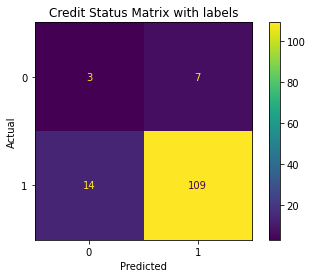

In [ ]:
model = RandomForestClassifier(class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1] 

train_probs = model.predict_proba(X_train)[:,1] 
train_predictions = model.predict(X_train)
cm = confusion_matrix(y_train, train_predictions)
print('TRAIN')
print('Accuracy: %.2f' % (accuracy_score(y_train, train_predictions)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_train, train_probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))

print('TEST')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_test, probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))
print('Loss: %.2f' % (cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1))
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Credit Status Matrix with labels', 
                xlabel='Predicted', 
                ylabel='Actual')
plt.show()
metrics['RF'] = [roc_auc_score(y_test, probs),
                          cm[0][0]/(cm[0][0] + cm[0][1]),
                          cm[1][1]/(cm[1][0] + cm[1][1]),
                          int(cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1)]

TRAIN
Accuracy: 0.86
ROC AUC Score: 0.61
accuracy 0: 0.31
accuracy 1: 0.90
TEST
Accuracy: 0.83
ROC AUC Score: 0.54
accuracy 0: 0.20
accuracy 1: 0.89
Loss: 6178088.70


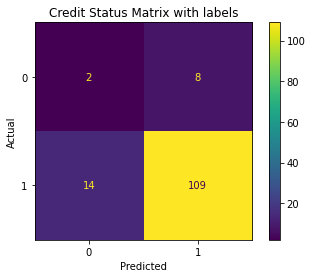

In [ ]:
model = lgb.LGBMClassifier(class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1] 

train_probs = model.predict_proba(X_train)[:,1] 
train_predictions = model.predict(X_train)
cm = confusion_matrix(y_train, train_predictions)
print('TRAIN')
print('Accuracy: %.2f' % (accuracy_score(y_train, train_predictions)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_train, train_probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))

print('TEST')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_test, probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))
print('Loss: %.2f' % (cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1))
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Credit Status Matrix with labels', 
                xlabel='Predicted', 
                ylabel='Actual')
plt.show()
metrics['LGBM'] = [roc_auc_score(y_test, probs),
                          cm[0][0]/(cm[0][0] + cm[0][1]),
                          cm[1][1]/(cm[1][0] + cm[1][1]),
                          int(cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1)]

In [ ]:
#логистическая регрессия и random forest показывают себя чуть лучше, чем LGBM
metrics

,LR,RF,LGBM
roc-auc,5.800813e-01,5.800813e-01,5.357724e-01
accuracy 0,3.000000e-01,3.000000e-01,2.000000e-01
accuracy 1,8.861789e-01,8.861789e-01,8.861789e-01
loss,5.735332e+06,5.735332e+06,6.178088e+06


In [ ]:
#остановимся на LogisticRegression и RandomForestClassifier и попробуем подтюнить паметры моделей, чтобы улучшить показатели
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs', 'newton-cg', 'liblinear'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

rf = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(rf, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
best_params = grid_cv.best_params_

model = LogisticRegression(**best_params, class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1] 

cm = confusion_matrix(y_test, y_pred)
metrics['Grid_LR'] = [roc_auc_score(y_test, probs),
                          cm[0][0]/(cm[0][0] + cm[0][1]),
                          cm[1][1]/(cm[1][0] + cm[1][1]),
                          int(cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1)]

In [ ]:
parameters_grid = {
    'min_samples_split' : [2, 5, 10],
    'max_features' : ["auto", "sqrt", "log2"],
    'class_weight': ["balanced", "balanced_subsample"],
    'max_depth': np.arange(1, 15, 1),
    'n_estimators': np.arange(100, 500, 1000)
}

lr = RandomForestClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
best_params = grid_cv.best_params_

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1] 

train_probs = model.predict_proba(X_train)[:,1] 
train_predictions = model.predict(X_train)

cm = confusion_matrix(y_test, y_pred)
metrics['Grid_RF'] = [roc_auc_score(y_test, probs),
                          cm[0][0]/(cm[0][0] + cm[0][1]),
                          cm[1][1]/(cm[1][0] + cm[1][1]),
                          int(cm[0][1]*median_loan*median_loss_0 + cm[1][0]*median_loan*median_loss_1)]

In [ ]:
#посмотрим на итоги нашего тюнинга
metrics
#лучше модели работать не стали (
#остановимся на логистической регрессии, потому что помимо лучших метрих также обладает и лучшей интерпретируемостью 

,LR,RF,LGBM,Grid_LR,Grid_RF
roc-auc,0.580081,0.580081,0.535772,0.584146,0.580081
accuracy 0,0.300000,0.300000,0.200000,0.300000,0.300000
accuracy 1,0.886179,0.886179,0.886179,0.886179,0.886179
loss,273111.000000,273111.000000,280822.000000,273111.000000,273111.000000


Вывод

In [ ]:
#если мы посмотрим на разброс ROC AUC при кросс валидации модели лог регрессии, то видим, что модель не обладает хорошими обобщающими способностями
#ее точность сильно зависит от разбиения данных, что может говорить нам о переобученности модели, но близкие значения метрик на train и test говорят нам о несостоятельности этой гипотезы
model = LogisticRegression(class_weight='balanced')
cv = KFold(n_splits=10, random_state=33, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('ROC AUC Score: %.2f +- (%.2f)' % (mean(scores), std(scores)))
print(scores)

ROC AUC Score: 0.62 +- (0.09)
[0.55208333 0.61111111 0.75       0.42307692 0.61184211 0.69078947
 0.56857143 0.67763158 0.6        0.68918919]


In [ ]:
#для улучшения качества модели необходимо собрать больше данных, чтобы с большей вероятностью получить более полную картину распределений признаков и целевой метрики
#также нужно собрать больше признаков, которые могут влиять на выдачу кредита, причем не только качественные, но и количественные 
#например: сколько уже работает ЮЛ, были ли раньше кредиты, отрасль бизнеса, данные с отчетов в абсолютных значениях (выручка, прибыль и т.д), изменения показателей компании м/м, к/к, г/г и другие

Приложение: влияние признаков на предсказание

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.9 MB/s 


In [ ]:
import shap

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


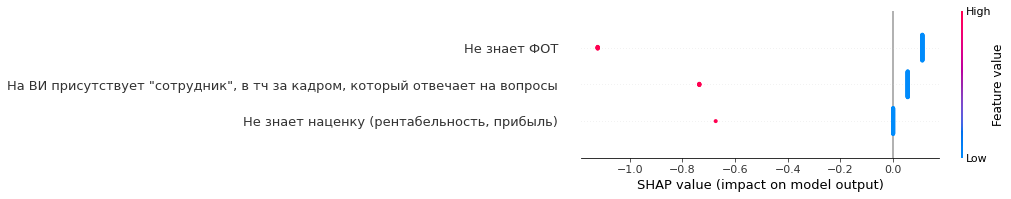

In [ ]:
#проиллюстрируем важность и степень влияния признаков в нашей модели
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
#признаки расположены по степени их важности по оси OY, по оси OX находится значение Шепли.
#цветом обозначены значения соответствующего признака: красный - высокие, синий - низкие. 
#незнание ФОТ сильно влияет на невыдачу кредита, присутствие сотрудника и незнание наценки меньше влияют на невыдачу кредита
#знание наценки не влияет на выдачу кредита, отсутствие сотрудника и знание ФОТ и знание ФОТ больше влияют на выдачу кредита

In [ ]:
#коэффициенты лог регрессии
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = model.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)
print(model.intercept_)
feature_imp

[0.2320247]


,feature,imp
2,"Не знает наценку (рентабельность, прибыль)",-0.673618
0,"На ВИ присутствует ""сотрудник"", в тч за кадром...",-0.791312
1,Не знает ФОТ,-1.232660


---------------------------------

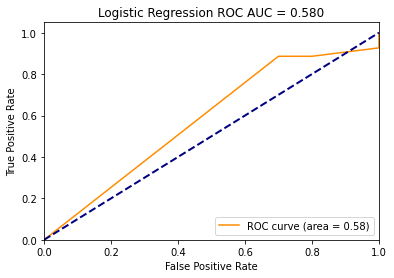

In [ ]:
#кривая ROC AUC для наглядности представления
fpr, tpr, thresholds = roc_curve(y_test, probs)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()